In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ROOT = os.path.join("/home", "niche", "COLO")
DIR_OUT = os.path.join(ROOT, "out", "yolo")
LS_DIR = [os.path.join(DIR_OUT, f) for f in os.listdir(DIR_OUT)]

In [4]:
data = pd.read_csv(os.path.join(LS_DIR[0], "results.csv"))
for i in range(1, len(LS_DIR)):
    data_tmp = pd.read_csv(os.path.join(LS_DIR[i], "results.csv"))
    data = pd.concat([data, data_tmp])
data

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.3717,0.6345,0.7304,0.5550,0.6307,436,128,463,b_light,yolov9c,16
1,0.4093,0.7375,0.7952,0.6412,0.7100,436,92,329,b_light,yolov9c,32
2,0.5238,0.8037,0.9181,0.6881,0.7866,436,128,46,b_light,yolov9c,64
3,0.5292,0.8119,0.9006,0.7179,0.7989,436,111,39,b_light,yolov9c,128
4,0.5728,0.8607,0.9185,0.7615,0.8326,436,87,55,b_light,yolov9c,256
...,...,...,...,...,...,...,...,...,...,...,...
88,0.7137,0.9458,0.9608,0.8958,0.9271,451,38,39,1_top,yolov8n,64
89,0.7040,0.9364,0.9473,0.8766,0.9106,451,41,53,1_top,yolov8n_2_side,64
90,0.7287,0.9599,0.9612,0.9332,0.9470,451,25,34,1_top,yolov8n,128
91,0.7397,0.9583,0.9530,0.9224,0.9374,451,32,27,1_top,yolov8n_2_side,128


In [6]:
data.query("n == 16").groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,0_all,yolov8m,16,3,3,3,3,3,3,3,3
1,0_all,yolov8n,16,3,3,3,3,3,3,3,3
2,0_all,yolov8x,16,3,3,3,3,3,3,3,3
3,0_all,yolov9c,16,4,4,4,4,4,4,4,4
4,0_all,yolov9e,16,4,4,4,4,4,4,4,4
5,1_top,yolov8m,16,1,1,1,1,1,1,1,1
6,1_top,yolov8m_2_side,16,1,1,1,1,1,1,1,1
7,1_top,yolov8n,16,2,2,2,2,2,2,2,2
8,1_top,yolov8n_2_side,16,2,2,2,2,2,2,2,2


In [8]:
data.config.unique()

array(['b_light', 'a1_t2s', 'a2_s2t', '0_all', '2_side', 'c_external',
       '3_external', '1_top'], dtype=object)

([<matplotlib.axis.XTick at 0x2aaaf77220d0>,
 [Text(16, 0, '16'),
  Text(32, 0, '32'),
  Text(64, 0, '64'),
  Text(128, 0, '128'),
  Text(256, 0, '256'),
  Text(500, 0, '500')])

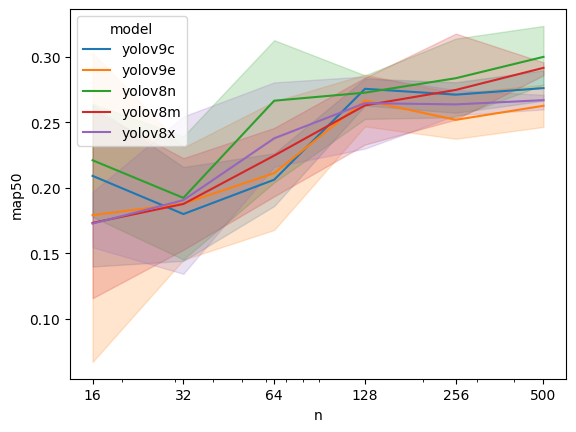

In [14]:
# config: 
sns.lineplot(data=data.query("config == 'a1_t2s'"), x="n", y="map50", hue="model",)
plt.xscale("log")
plt.xticks([16, 32, 64, 128, 256, 500], [16, 32, 64, 128, 256, 500])

In [16]:
data.model.unique()

array(['yolov9c', 'yolov9e', 'yolov8n', 'yolov8m', 'yolov8x',
       'yolov9c_1_top', 'yolov9e_1_top', 'yolov8n_1_top', 'yolov8m_1_top',
       'yolov8x_1_top', 'yolov9c_0_all', 'yolov9e_0_all', 'yolov8n_0_all',
       'yolov8m_0_all', 'yolov8x_0_all', 'yolov9c_2_side',
       'yolov9e_2_side', 'yolov8n_2_side', 'yolov8m_2_side',
       'yolov8x_2_side'], dtype=object)

<AxesSubplot: xlabel='n', ylabel='map50'>

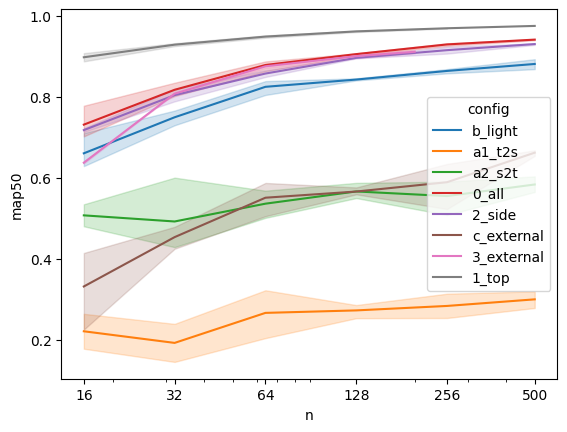

In [29]:
# config: 
plt.xscale("log")
plt.xticks([16, 32, 64, 128, 256, 500], [16, 32, 64, 128, 256, 500])
sns.lineplot(data=data.query("model == 'yolov8n'"), 
             x="n",
             y="map50", 
             hue="config",)

In [31]:
data.to_csv(os.path.join(DIR_OUT, "out.csv"), index=False)

In [32]:
data_long = data.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
data_long

,model,config,n,metric,value
0,yolov9c,b_light,16,map5095,0.3717
1,yolov9c,b_light,32,map5095,0.4093
2,yolov9c,b_light,64,map5095,0.5238
3,yolov9c,b_light,128,map5095,0.5292
4,yolov9c,b_light,256,map5095,0.5728
...,...,...,...,...,...
6523,yolov8n,1_top,64,n_fp,39.0000
6524,yolov8n_2_side,1_top,64,n_fp,53.0000
6525,yolov8n,1_top,128,n_fp,34.0000
6526,yolov8n_2_side,1_top,128,n_fp,27.0000


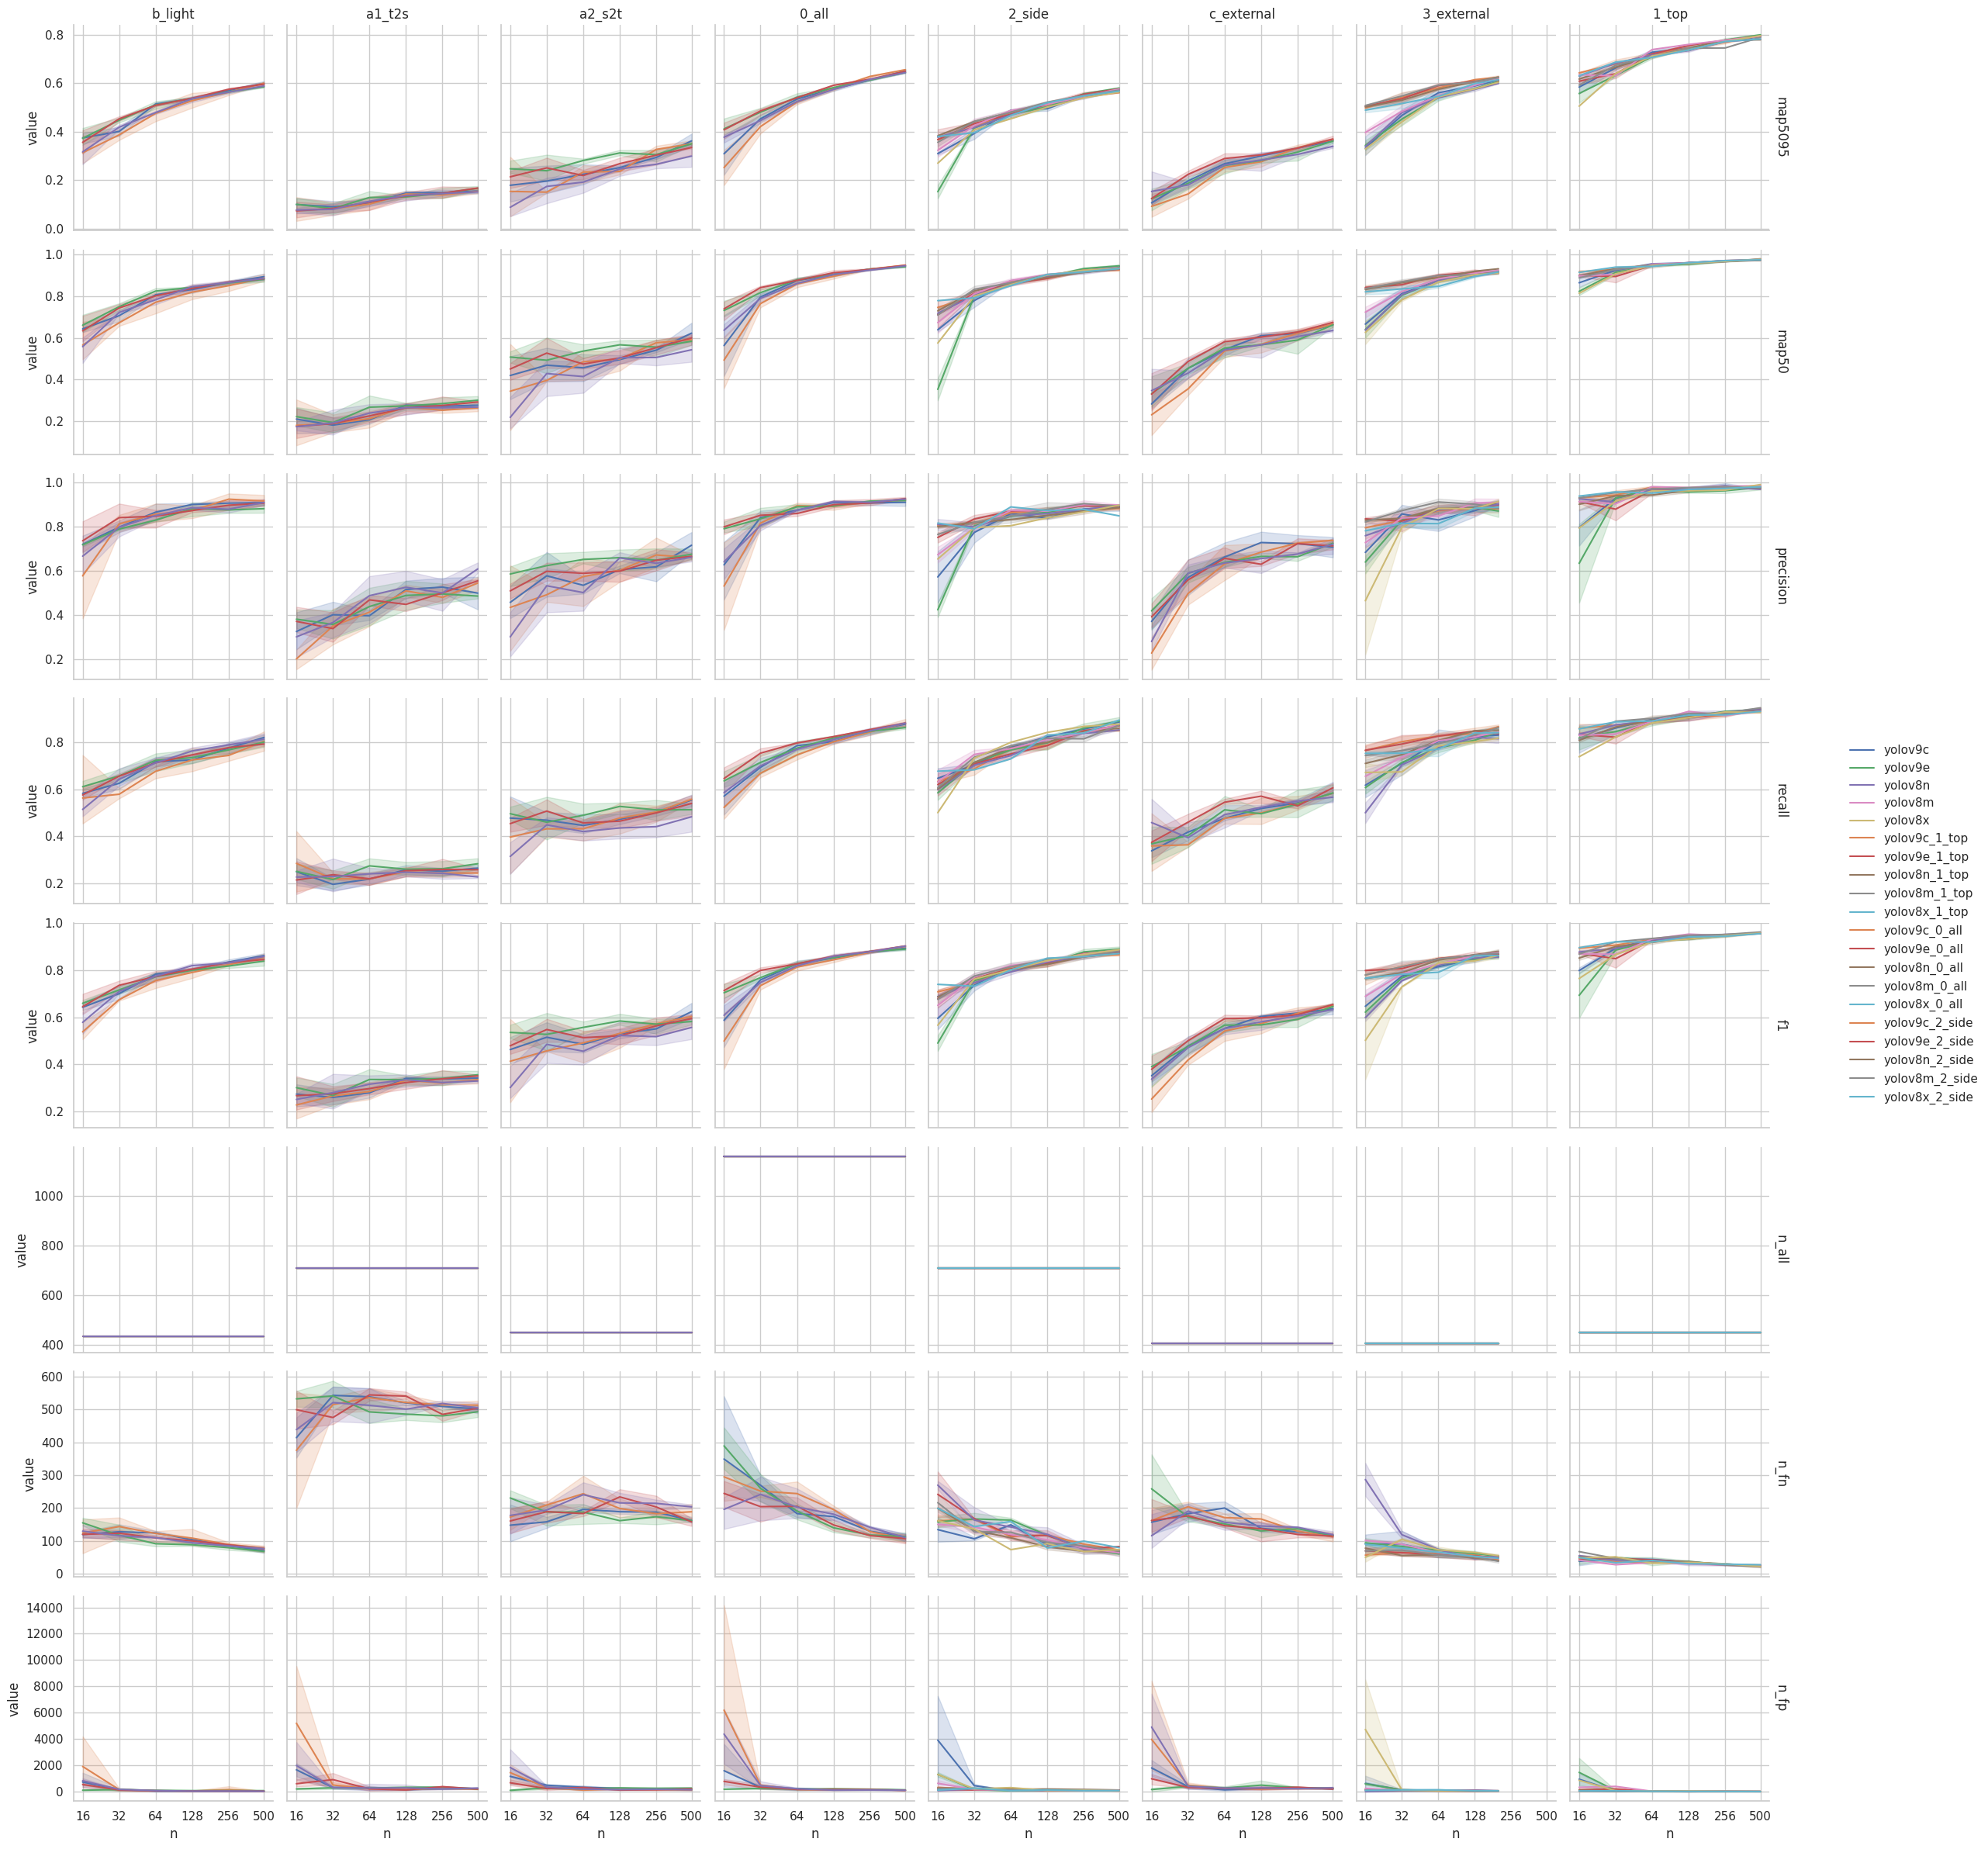

In [34]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
g.set(xscale="log")
g.set(xticks=[16, 32, 64, 128, 256, 500], 
      xticklabels=[16, 32, 64, 128, 256, 500])
plt.show()